## Imports


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, recall_score , median_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score

**Tutorial del proyecto de árbol de decisión**

- Comprender un dataset nuevo.
- Procesarlo aplicando un análisis exploratorio (EDA).
- Modelar los datos construyendo un árbol de decisión.
- Analizar los resultados y optimizar el modelo.

**🌱 Cómo iniciar este proyecto**
Sigue las siguientes instrucciones:

1. Crea un nuevo repositorio basado en el proyecto de Machine Learning haciendo clic aquí.
2. Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
3. Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.

**🚛 Cómo entregar este proyecto**
Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

**📝 Instrucciones**
**Prediciendo la diabetes**

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

**Paso 1: Carga del conjunto de datos**
El conjunto de datos se puede encontrar en esta carpeta de proyecto bajo el nombre diabetes.csv. Puedes cargarlo en el código directamente desde el siguiente enlace:

https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv
O descargarlo y añadirlo a mano en tu repositorio. En este conjunto de datos encontrarás las siguientes variables:

Pregnancies. Número de embarazos del paciente (numérico)
Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)
SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
Insulin. 

Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

BMI. Índice de masa corporal (numérico)

DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

Age. Edad del paciente (numérico)

Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

**Paso 2: Realiza un EDA completo**

Este segundo paso es vital para asegurar que nos quedamos con las variables estrictamente necesarias y eliminamos las que no son relevantes o no aportan información. Utiliza el Notebook de ejemplo que trabajamos y adáptalo a este caso de uso.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores.

**Paso 3: Construye un modelo de árbol de decisión**

Comienza a resolver el problema implementando un árbol de decisión y analiza cuál de los dos tipos satisface tus necesidades. Entrénalo y analiza sus resultados. Prueba a modificar la función de cálculo de la pureza de los nodos y utiliza todas las disponibles. Descríbelas y analiza sus resultados graficándolos.

**Paso 4: Optimiza el modelo anterior**

Después de entrenar el árbol con las distintas funciones de pureza, selecciona el mejor de ellos y optimiza sus hiperparámetros utilizando un grid search.

**Paso 5: Guarda el modelo**

Almacena el modelo en la carpeta correspondiente.

Nota: También incorporamos muestras de solución en ./solution.ipynb que te sugerimos honestamente que solo uses si estás atascado por más de 30 minutos o si ya has terminado y quieres compararlo con tu enfoque.

## EDA

### Paso 1: Planteamos nuestro problema o nuestro target a investigar

#### El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

### Paso 2: Recopilacion de datos

In [68]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/Prediciendo la diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Paso 3: Análisis Descriptivo

In [69]:
df.shape

(768, 9)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [72]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [73]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Paso 4: Limpieza de Datos

#### Buscamos valores nulos

In [74]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Buscamos valores duplicados

In [75]:
df.duplicated().sum()

np.int64(0)

### Paso 5: Análisis de Variables

#### Análisis de Variables Univariante

##### Análisis de Variables Univariante Categóricas:

En este caso pueden ser las siguientes:

1. Pregnancies
2. Age	
3. Insulin
4. Outcome

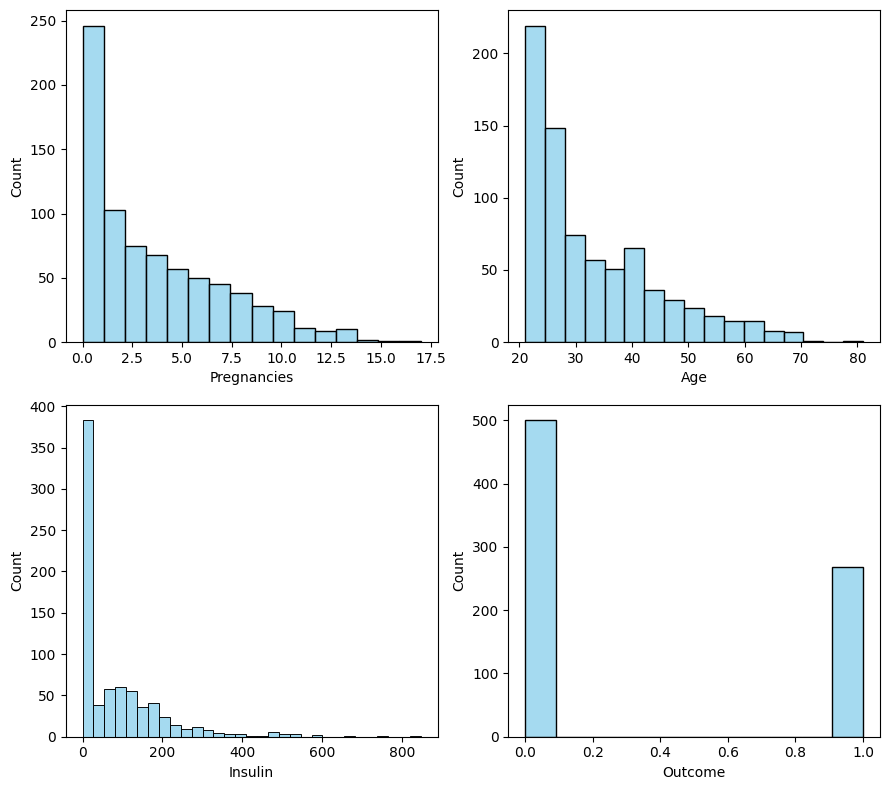

In [76]:
fig, axis = plt.subplots(2, 2, figsize=(9, 8))

sns.histplot(ax=axis[0, 0], data=df, x="Pregnancies", color='skyblue')
sns.histplot(ax=axis[0, 1], data=df, x="Age", color='skyblue')
sns.histplot(ax=axis[1, 0], data=df, x="Insulin", color='skyblue')
sns.histplot(ax=axis[1, 1], data=df, x="Outcome", color='skyblue')

plt.tight_layout()
plt.show()

#### Análisis de Variables Univariante Numéricas


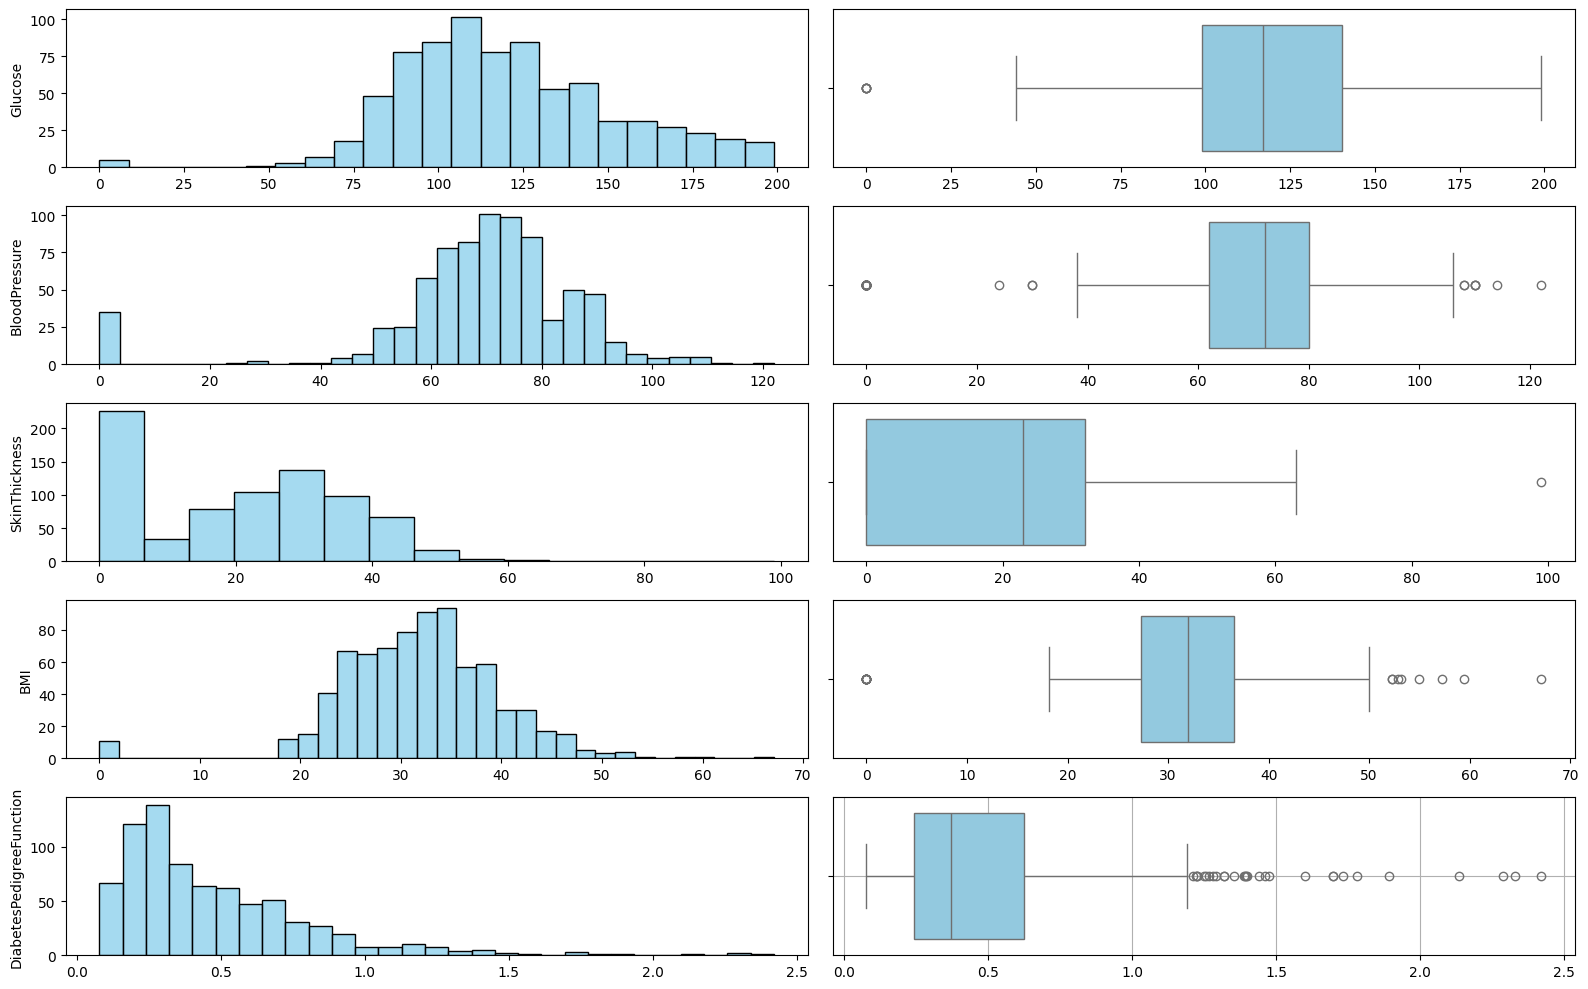

In [77]:
fig, axis = plt.subplots(5, 2, figsize=(16, 10))

sns.histplot(ax=axis[0, 0], data=df, x="Glucose", color='skyblue').set(xlabel=None,ylabel="Glucose")
sns.boxplot(ax=axis[0, 1], data=df, x="Glucose", color='skyblue').set(xlabel=None,)
sns.histplot(ax=axis[1, 0], data=df, x="BloodPressure", color='skyblue').set(xlabel=None, ylabel="BloodPressure")
sns.boxplot(ax=axis[1, 1], data=df, x="BloodPressure", color='skyblue').set(xlabel=None,)
sns.histplot(ax=axis[2, 0], data=df, x="SkinThickness", color='skyblue').set(xlabel=None, ylabel="SkinThickness")
sns.boxplot(ax=axis[2, 1], data=df, x="SkinThickness", color='skyblue').set(xlabel=None,)
sns.histplot(ax=axis[3, 0], data=df, x="BMI", color='skyblue').set(xlabel=None, ylabel="BMI")
sns.boxplot(ax=axis[3, 1], data=df, x="BMI", color='skyblue').set(xlabel=None,)
sns.histplot(ax=axis[4, 0], data=df, x="DiabetesPedigreeFunction", color='skyblue').set(xlabel=None, ylabel="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[4, 1], data=df, x="DiabetesPedigreeFunction", color='skyblue').set(xlabel=None,)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Análisis de Variables Multivariante

##### Análisis categórico-categórico

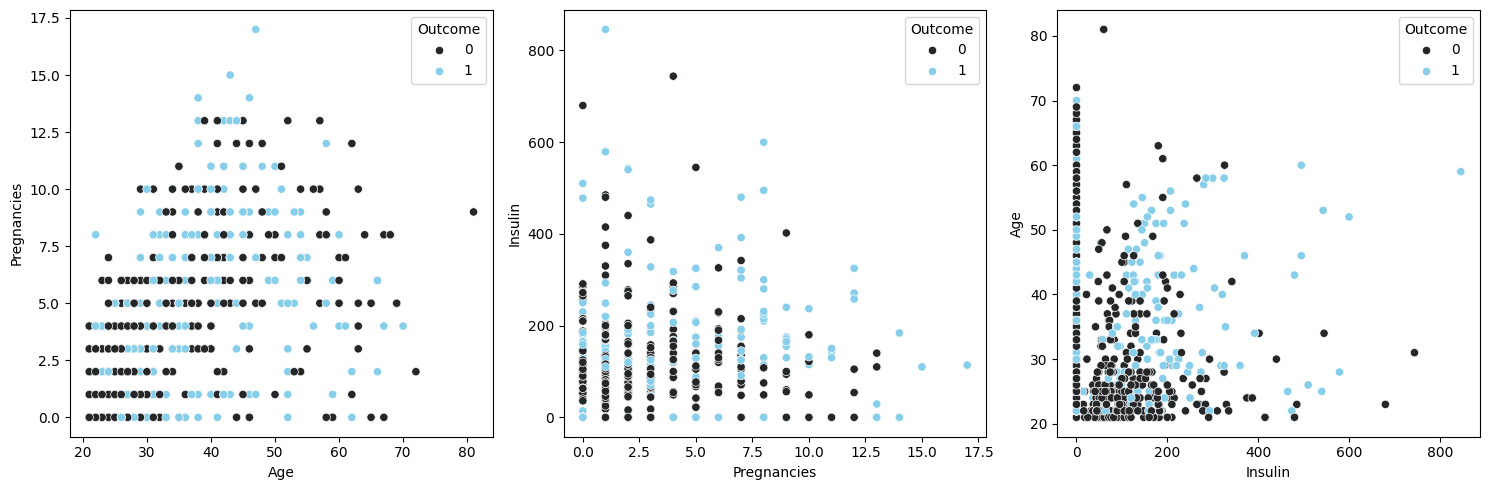

In [78]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=df, ax=axes[0], palette='dark:skyblue')
sns.scatterplot(x='Pregnancies', y='Insulin', hue='Outcome', data=df, ax=axes[1], palette='dark:skyblue')
sns.scatterplot(x='Insulin', y='Age', hue='Outcome', data=df, ax=axes[2], palette='dark:skyblue')

plt.tight_layout()
plt.show()

#### Análisis de correlaciones

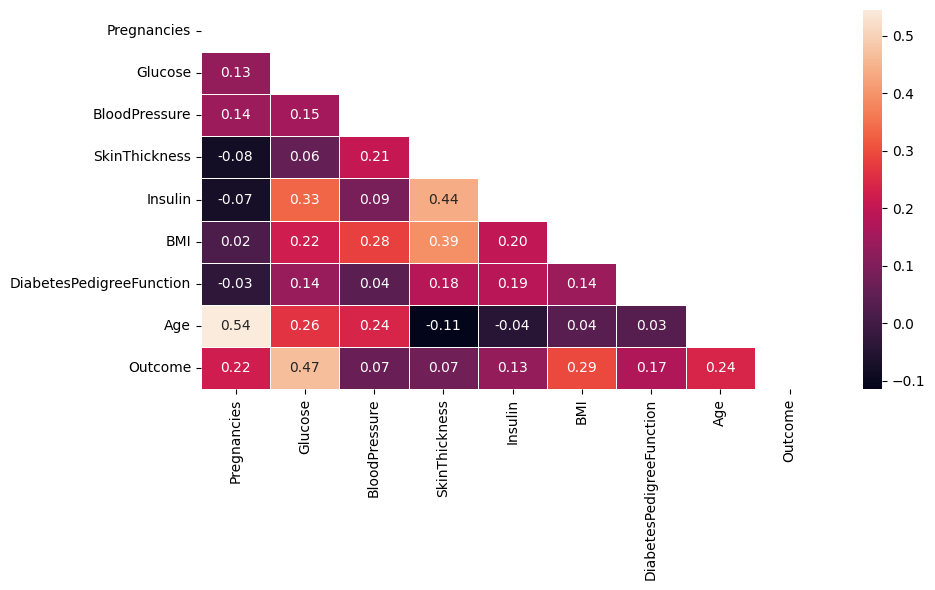

In [79]:
corr = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction",
           "Age", "Outcome",]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

### Paso 6: Ingeniería de características

#### Análisis de outliers

**Outliers: Análisis descriptivo**

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Outliers: Visualización y eliminacion**

In [81]:
outliers_dict = {}

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = len(outliers)
outliers_dict

{'Pregnancies': 4,
 'Glucose': 5,
 'BloodPressure': 45,
 'SkinThickness': 1,
 'Insulin': 34,
 'BMI': 19,
 'DiabetesPedigreeFunction': 29,
 'Age': 9,
 'Outcome': 0}

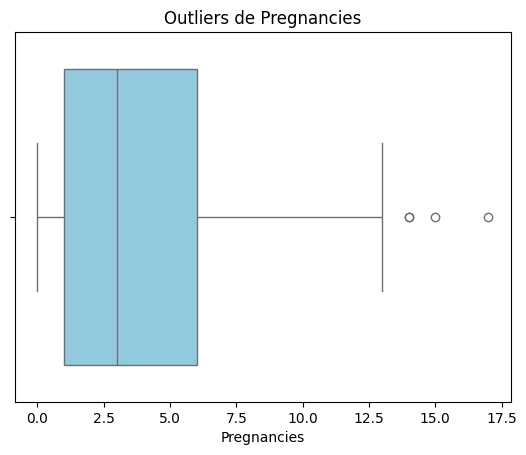

In [82]:
sns.boxplot(x="Pregnancies", data=df, color='skyblue')
plt.title('Outliers de Pregnancies')
plt.show()

In [83]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["Pregnancies"].quantile(0.25)
q3 = df["Pregnancies"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 13.5, límite inferior: 0, rango intercuartílico: 5.0'

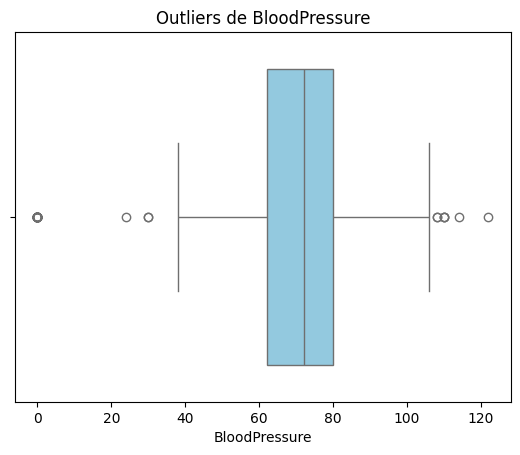

In [84]:
sns.boxplot(x="BloodPressure", data=df, color='skyblue')
plt.title('Outliers de BloodPressure')
plt.show()

In [85]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["BloodPressure"].quantile(0.25)
q3 = df["BloodPressure"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 107.0, límite inferior: 35.0, rango intercuartílico: 18.0'

In [113]:
outliers = df[(df['BloodPressure'] > 107.0)]
outliers.groupby('BMI')['Outcome'].describe().T

BMI,22.4,28.5,39.2,42.3,45.4,48.8,67.1
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.0,0.0,1.0,1.0,1.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,1.0,1.0,1.0,1.0
25%,0.0,0.0,0.0,1.0,1.0,1.0,1.0
50%,0.0,0.0,0.0,1.0,1.0,1.0,1.0
75%,0.0,0.0,0.0,1.0,1.0,1.0,1.0
max,0.0,0.0,0.0,1.0,1.0,1.0,1.0


- En pacientes con BloodPressure > 107, los que tienen BMI más alto (≥ 42.3 en tu salida) aparecen todos con Outcome = 1.
- Los que tienen BMI más bajo (22–39) aparecen con Outcome = 0.
- Esto sugiere un patrón fuerte: dentro de los outliers de presión sanguínea, el BMI parece estar correlacionado con el diagnóstico positivo.


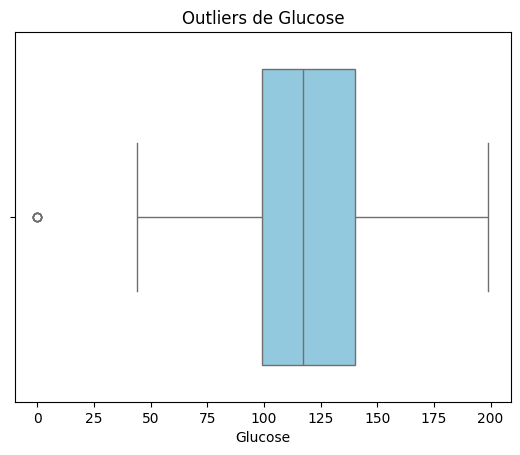

In [86]:
sns.boxplot(x="Glucose", data=df, color='skyblue')
plt.title('Outliers de Glucose')
plt.show()

In [87]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["Glucose"].quantile(0.25)
q3 = df["Glucose"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 202.12, límite inferior: 37.12, rango intercuartílico: 41.25'

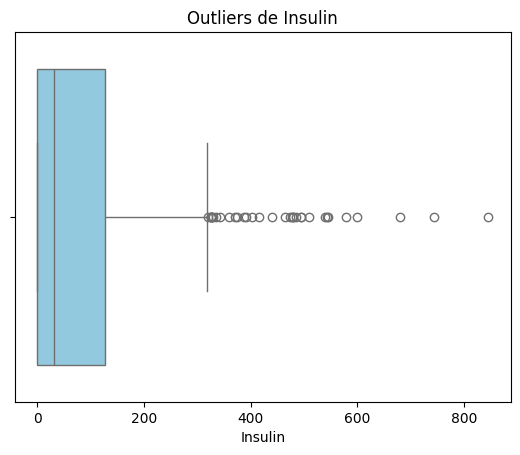

In [88]:
sns.boxplot(x="Insulin", data=df, color='skyblue')
plt.title('Outliers de Insulin')
plt.show()

In [107]:
outliers = df[(df['Insulin'] > 318.12)]
outliers.groupby('Glucose')['Outcome'].describe().T

Glucose,105,124,127,129,131,134,139,140,142,143,...,165,168,172,173,177,181,187,189,193,197
count,1.0,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.000000
mean,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.500000
std,NaN,0.707107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.707107
min,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000
25%,0.0,0.250000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.250000
50%,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.500000
75%,0.0,0.750000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.750000
max,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.000000


In [94]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 318.12, límite inferior: 0, rango intercuartílico: 127.25'

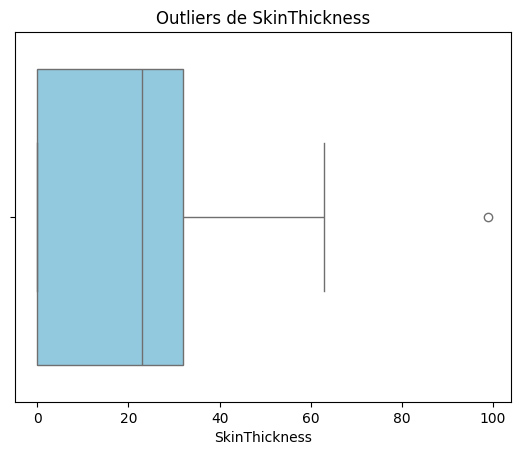

In [ ]:
sns.boxplot(x="SkinThickness", data=df, color='skyblue')
plt.title('Outliers de SkinThickness')
plt.show()

In [93]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["SkinThickness"].quantile(0.25)
q3 = df["SkinThickness"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 80.0, límite inferior: 0, rango intercuartílico: 32.0'

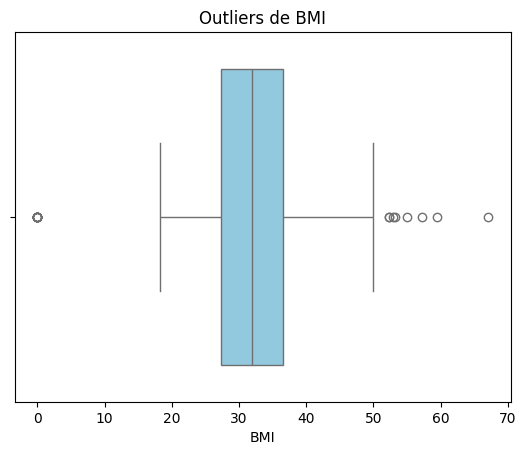

In [ ]:
sns.boxplot(x="BMI", data=df, color='skyblue')
plt.title('Outliers de BMI')
plt.show()

In [92]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 50.55, límite inferior: 13.35, rango intercuartílico: 9.3'

In [116]:
outliers = df[(df['BMI'] > 50.55)]
outliers.groupby('Age')['Outcome'].describe().T

Age,22,23,25,26,28,40
count,1.0,1.0,2.0,2.0,1.0,1.0
mean,0.0,0.0,1.0,1.0,1.0,1.0
std,NaN,NaN,0.0,0.0,NaN,NaN
min,0.0,0.0,1.0,1.0,1.0,1.0
25%,0.0,0.0,1.0,1.0,1.0,1.0
50%,0.0,0.0,1.0,1.0,1.0,1.0
75%,0.0,0.0,1.0,1.0,1.0,1.0
max,0.0,0.0,1.0,1.0,1.0,1.0


- En pacientes con BMI muy alto (> 50.55), la mayoría de los casos están asociados a Outcome = 1 (diagnóstico positivo).
- Solo los pacientes jóvenes (22 y 23 años) aparecen con Outcome = 0.
- Esto sugiere que la combinación de obesidad extrema y edad más avanzada está fuertemente correlacionada con diagnóstico positivo.


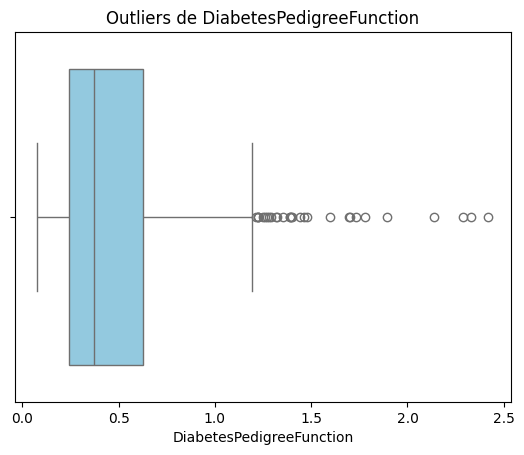

In [ ]:
sns.boxplot(x="DiabetesPedigreeFunction", data=df, color='skyblue')
plt.title('Outliers de DiabetesPedigreeFunction')
plt.show()

In [91]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["DiabetesPedigreeFunction"].quantile(0.25)
q3 = df["DiabetesPedigreeFunction"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 1.2, límite inferior: 0, rango intercuartílico: 0.38'

In [115]:
outliers = df[(df['DiabetesPedigreeFunction'] > 1.2)]
outliers.groupby('BMI')['Outcome'].describe().T

BMI,0.0,23.1,24.2,25.1,27.1,27.7,28.2,28.5,29.0,30.0,...,38.4,39.0,40.0,40.5,40.8,42.0,42.9,43.1,43.3,59.4
count,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.0,0.0,0.0,0.500000,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
std,NaN,NaN,NaN,NaN,0.707107,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
25%,0.0,0.0,0.0,0.0,0.250000,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
50%,0.0,0.0,0.0,0.0,0.500000,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
75%,0.0,0.0,0.0,0.0,0.750000,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
max,0.0,0.0,0.0,0.0,1.000000,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0


- En pacientes con alto DiabetesPedigreeFunction (> 1.2), la mayoría de los BMI están asociados con Outcome = 1 (diagnóstico positivo).
- Solo algunos valores bajos de BMI (23–25) aparecen con Outcome = 0.
- Esto sugiere que en este subconjunto, tener un historial familiar fuerte + BMI elevado está muy correlacionado con diagnóstico positivo.


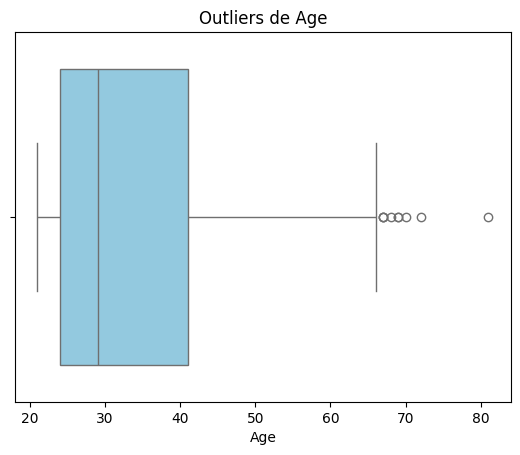

In [ ]:
sns.boxplot(x="Age", data=df, color='skyblue')
plt.title('Outliers de Age')
plt.show()

In [90]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 66.5, límite inferior: 0, rango intercuartílico: 17.0'

### Paso 7: Split 80/20

In [120]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para test
    random_state=42,    # semilla para reproducibilidad
    stratify=y          # mantiene la proporción de clases en train y test
)


In [124]:
ruta = "models/train_test_split.pkl"

with open(ruta, "wb") as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)
